In [ ]:
import random
import numpy as np
import sys
import scipy
np.set_printoptions(threshold=sys.maxsize) # display the complete matrix
import matplotlib.pyplot as plt
from __future__ import division 
from scipy import stats
from tqdm import tqdm

In [ ]:
def line(p1, p2): # input list, [0] is x, [1] is y
    A = (p1[1] - p2[1]) # delta y
    B = (p2[0] - p1[0]) # delta x
    C = (p1[0]*p2[1] - p2[0]*p1[1])
    return A, B, -C

'''
Input: two lines, both are 3-element tuples
Return: one 2-element tuple or False
'''
def intersection(L1, L2): # input two lines
    D  = L1[0] * L2[1] - L1[1] * L2[0]
    Dx = L1[2] * L2[1] - L1[1] * L2[2]
    Dy = L1[0] * L2[2] - L1[2] * L2[0]
    # print(D)
    if D != 0:
        x = Dx / D
        y = Dy / D
        # print('case 1')
        return x,y
    else:
        
        # print('case 2')
        return False

In [ ]:
## global variables and parameters
m1 = 1
m2 = 0.3
l = 20 
m = m1+m2

## billiard representation
l2 = l*(m2/m)**(1/2) # when the position of the second billiard, represented by y, is in (0,l1), m2 is in the entry chamber, also the billiard (x,y) is in the triangle area
l1 = l*(m1/m)**(1/2)
theta = np.arctan((m2/m1)**(1/2)) # angle between the hypotenuse and the top side

# normal distribution of v1
mu = 0 # velocity can be positive or negative, define the positive direction to be the right
sigma = 30

# three points of the triangle
left_top = [0,l2]
bottom = [0,0]
right_top = [l1,l2]

# define the following for the function collide
left = line(left_top, bottom)
top = line(left_top, right_top)
hypo = line(bottom, right_top)


In [ ]:
def angle(vector_1, vector_2): # input two vectors [x,y]
    unit_vector_1 = vector_1 / np. linalg. norm(vector_1)
    unit_vector_2 = vector_2 / np. linalg. norm(vector_2)
    dot_product = np. dot(unit_vector_1, unit_vector_2)
    angle = np. arccos(dot_product)
    return angle # in radians

In [ ]:
'''
determine where the next collision will be.
input: current x,y,v1,v2
return: v2
'''
def collide(x,y,v1,v2):
    x_list = []
    y_list = []
    while True:
        x_list.append(x)
        # x_alt.append(x)
        y_list.append(y)
        # y_alt.append(y)
        p1 = [x,y]
        p2 = [x+v1,y+v2]
        # x_alt.append(p2[0])
        # y_alt.append(p2[1])
        way = line(p1,p2) # the intended straight-line motion

        # which side will the velocity vector intersect, within the range of the triangle
        xLeft = intersection(way, left)
        alreadyHit = False
        if xLeft:
            if xLeft[0]==0 and xLeft[1]<l2 and xLeft[1]>0 and v1<0: 
                alreadyHit = True
                x = xLeft[0]
                y = xLeft[1]
                v1,v2 = hitLeft(v1,v2) # velocity after collision
                # print("v1,v2 after colliding with left is ", v1,v2)                    

        xTop = intersection(way, top)
        # print("xTop: ",xTop)
        if xTop:
            if xTop[0]<l1 and xTop[0]>0 and v2>0:
                alreadyHit = True
                x_list.append(xTop[0])
                y_list.append(xTop[1])
                # out, record the exiting v2
                # v2_seq.append(v2)
                # print("out:",v2)
                break
                
        xHypo = intersection(way, hypo)
        if xHypo: # incase the vector is parallel to hypo and xhypo is a boolean
            if xHypo[0]<l1 and xHypo[0]>0 and xHypo[1]<l2 and xHypo[1]>0 and alreadyHit == False: # assumption: the line only intersects with one of the three sides within the range
                x = xHypo[0]
                y = xHypo[1]
                v1,v2 = hitHypo(v1,v2) # velocity after collision
                # print("v1,v2 after colliding with hypotenuse is ",v1, v2)

    # after exiting the while loop            
    return v2


In [ ]:
'''
Given the collision position and a velocity vector, find the reflected velocity.
Input: v1, v2
Output: v1, v2
'''
def hitHypo(v1,v2):
    # find new velocity
    V = (v1**2+v2**2)**(1/2) # norm of velocity
    upHyp = [l1,l2] # vector in the up direction along the hypotenuse
    vector_v = [v1,v2]
    intersection_angle = angle(vector_v,upHyp)
    beta = np.pi - intersection_angle - theta
    v1 = -np.cos(beta)*V
    v2 = np.sin(beta)*V
    return v1,v2
    
def hitLeft(v1,v2):
    # find new velocity
    v1 = -v1
    return v1,v2

In [ ]:
'''
Initialize m1 by choosing its position and velocity from uniform distribution and normal distribution respectively.
Returns the position and velocity of m1.
'''
def activateM1():
    x = random.uniform(0,l1) # generate a position within the range (0,l1)
    v1 = random.gauss(0, sigma)
    return x,v1

def simulation(initial_v2,n): # revised for transition matrix
    v2_seq = []
    v2 = initial_v2
    for i in range(n): # n is the number of repetitions
        x,v1 = activateM1()
        temp = collide(x,l2,v1,v2) # temp is v2 after the collision
        v2_seq.append(temp) # always use the input v2!!!
        # v2 = -temp 

    if n==1: # visualize the first trajectory
        plt.plot([0,0,l1,0],[l2,0,l2,l2])
        plt.plot(x_list,y_list)
        # plt.plot(x_alt,y_alt,color='red')
        
    return v2_seq

(array([ 4., 19., 20., 29., 28., 23., 25., 29., 21., 22., 28., 27., 20.,
        31., 23., 29., 23., 32., 22., 24., 17., 23., 14., 19., 17., 25.,
        20., 18., 18., 13., 18., 15., 16., 18., 22., 11., 13.,  8., 13.,
        12., 12.,  7.,  9., 13., 14., 11.,  4., 11.,  7.,  6.,  6.,  7.,
         8.,  3.,  4.,  4.,  4.,  5.,  5.,  4.,  4.,  3.,  3.,  3.,  2.,
         1.,  2.,  3.,  2.,  2.,  2.,  1.,  1.,  3.,  1.,  0.,  3.,  0.,
         0.,  0.,  1.,  1.,  0.,  1.,  1.,  2.,  1.,  2.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([ 0.1999189 ,  0.93754352,  1.67516814,  2.41279275,  3.15041737,
         3.88804198,  4.6256666 ,  5.36329122,  6.10091583,  6.83854045,
         7.57616507,  8.31378968,  9.0514143 ,  9.78903892, 10.52666353,
        11.26428815, 12.00191276, 12.73953738, 13.477162  , 14.21478661,
        14.95241123, 15.69003585, 16.42766046, 17.16528508, 17.9029097 ,
        18.64053431, 19.37815893, 20.11578354, 20.85340816, 21.591032

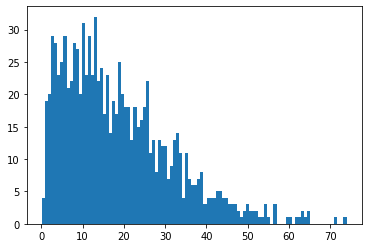

In [ ]:
# distribution
# v2_seq = []
rep = 1000
v2_seq = simulation(-1,rep) # v2 should always be negative
# int_results = [int(x) for x in results]
# print("integer results: ", int_results)
plt.hist(v2_seq, 100)

In [ ]:
def getP(n):
    # print("m2 in getP ",m2)
    # transition matrix
    P = np.zeros((n,n))
    for i in range(0,n): # index of the row, meaning the initial speed # speed starts from 1
        rep = 1000
        initial_v2 = -i # v2 should always be negative
        if i == 0:
            initial_v2 = -0.0000000001
        results = simulation(initial_v2, rep)  # results is the list of speeds after one collision
        int_results = [int(x) for x in results] # same number as rep

        # fill up the i-th row
        for j in range(0,n):
            # if j is not the last element n-1
            if j != n-1:
                occur = int_results.count(j)
                p = occur/rep
                P[i][j] = p
            if j == n-1:
                P[i][j]=1-np.sum(P[i][0:j]) # P[i][0:j] is the sum of the i-th row except for the last element
        # print("sum of P[{}] is ".format(i), np.sum(P[i]))

    # print("P:",P)
    return P

def spectral_gap(P):
    eig_val = np.linalg.eigvals(P)
    sorted = np.sort(eig_val)
    gap = 1-sorted[-2].real # 1-second largest eigenvalue
    return gap

In [ ]:
n = 100 # range of initial and transitioned speeds # determined by sigma and mass ratio
P = getP(n)
gap = spectral_gap(P.transpose())

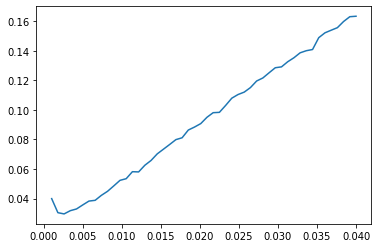

In [ ]:
ratio = np.linspace(0.001,0.04,50)
gaps = []
for r in ratio:
    ## global variables and parameters
    m1 = 1
    m2 = r
    l = 20 
    m = m1+m2

    ## billiard representation
    l2 = l*(m2/m)**(1/2) # when the position of the second billiard, represented by y, is in (0,l1), m2 is in the entry chamber, also the billiard (x,y) is in the triangle area
    l1 = l*(m1/m)**(1/2)
    theta = np.arctan((m2/m1)**(1/2)) # angle between the hypotenuse and the top side

    # normal distribution of v1
    mu = 0 # velocity can be positive or negative, define the positive direction to be the right
    sigma = 30

    # three points of the triangle
    left_top = [0,l2]
    bottom = [0,0]
    right_top = [l1,l2]

    # define the following for the function collide
    left = line(left_top, bottom)
    top = line(left_top, right_top)
    hypo = line(bottom, right_top)


    # print("m2 in ratio loop ", m2)
    P = getP(100)
    gap = spectral_gap(P)
    # print("gap ", gap)
    gaps.append(gap)

plt.plot(ratio, gaps)

# Spectral gap vs. square root of mass ratio:

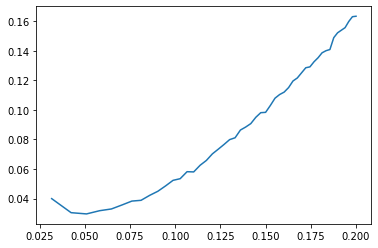

In [ ]:
ratio_sqrt = np.sqrt(np.array(ratio))
gaps_array = np.array(gaps)
plt.plot(ratio_sqrt,gaps_array)

To optimize this plot, we can 

1) make a finer matrix, and

2) use a more numerically accurate method to find eigenvalues and eigenvectors (something similar to eigs in matlab).